In [40]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Загрузка данных из двоичных файлов...
Загрузка завершена


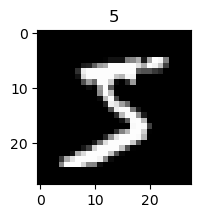

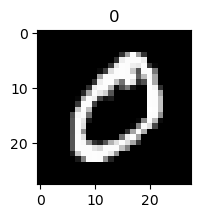

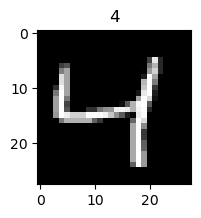

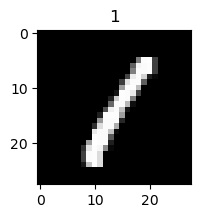

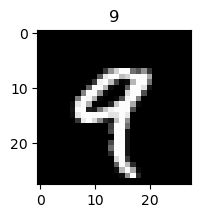

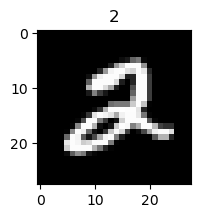

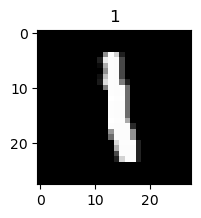

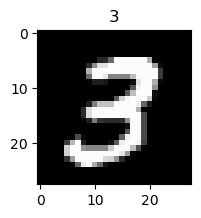

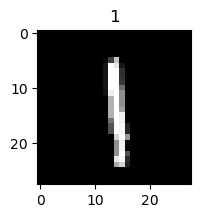

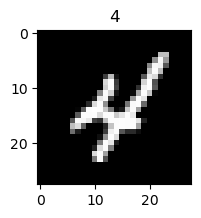

In [41]:

img_rows = img_cols = 28
path_to_data = r'C:\Users\gagag\Desktop\3 курс\Графика\ЛР8'
def load_data(path_to_data, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(path_to_data + '\images_trn.bin', 'rb') as rb:
        x_trn = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + '\labels_trn.bin', 'rb') as rb:
        y_trn = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + '\images_tst.bin', 'rb') as rb:
        x_tst = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + '\labels_tst.bin', 'rb') as rb:
        y_tst = np.fromfile(rb, dtype = np.uint8)
    x_trn = x_trn.reshape(-1, img_rows * img_cols)
    x_tst = x_tst.reshape(-1, img_rows * img_cols)
    return x_trn, y_trn, x_tst, y_tst
# Загрузка обучающего и проверочного множества из бинарных файлов
# Загружаются изображения и их метки
x_trn, y_trn, x_tst, y_tst = load_data(path_to_data, img_rows, img_cols)
print("Загрузка завершена")
# print(x_trn,y_trn)
# print(len(x_trn),len(y_trn))
# print(len(x_tst),len(y_tst))


def plot_images(images, labels):
    plt.figure(figsize=(30, 2))
    plt.imshow(images.reshape(img_rows, img_cols), cmap='gray')
    plt.title(labels)
    plt.show()

# Вывод первых 10 изображений из обучающего набора
for i in range(10):
    plot_images(x_trn[i], y_trn[i])

In [42]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

linear_regressor.fit(x_trn, y_trn)


LinearRegression()

In [43]:
from sklearn.metrics import classification_report
y_pred = linear_regressor.predict(x_tst).astype('int32')
unique_classes = np.unique(y_tst)

target_names = [f'class {i}' for i in unique_classes]

print(classification_report(y_tst, y_pred, target_names=target_names,zero_division = 0,labels=unique_classes))

              precision    recall  f1-score   support

     class 0       0.75      0.38      0.50       980
     class 1       0.47      0.47      0.47      1135
     class 2       0.22      0.27      0.24      1032
     class 3       0.23      0.31      0.27      1010
     class 4       0.20      0.31      0.24       982
     class 5       0.16      0.26      0.20       892
     class 6       0.16      0.21      0.18       958
     class 7       0.25      0.22      0.23      1028
     class 8       0.14      0.06      0.09       974
     class 9       0.45      0.05      0.09      1009

   micro avg       0.26      0.26      0.26     10000
   macro avg       0.30      0.25      0.25     10000
weighted avg       0.31      0.26      0.26     10000



C:\Users\gagag\AppData\Local\Temp\ipykernel_69212\989125273.py:2: RuntimeWarning: invalid value encountered in cast
  y_pred = linear_regressor.predict(x_tst).astype('int32')


KMeans(n_clusters=10, n_init='auto', random_state=0)
60000
10


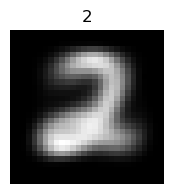

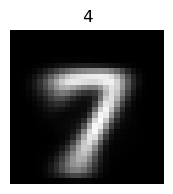

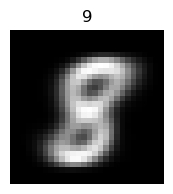

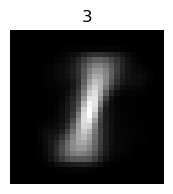

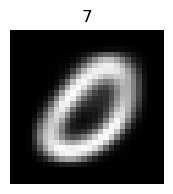

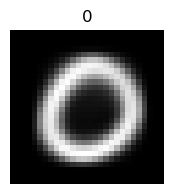

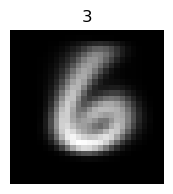

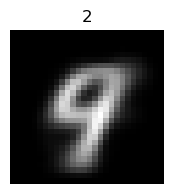

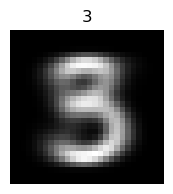

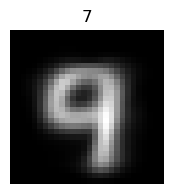

In [44]:
x_trn_norm = x_trn / 255.0  # Приведение пиксельных значений в диапазон [0,1]

# 2. Применим K-Means
k = 10  # Вы предполагаете, что у вас 10 кластеров (соответствуют 10 цифрам MNIST)
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
print(kmeans)
kmeans.fit(x_trn_norm)

# Получить метки кластеров и центроиды
labels = kmeans.labels_

centroids = kmeans.cluster_centers_
print(len(labels))
print(len(centroids))
# 3. Визуализация центроидов
def plot_centroids(centroids, labels):
    plt.figure(figsize=(8, 2))
    plt.imshow(centroids.reshape(img_rows, img_cols), cmap='gray')
    plt.title(labels)
    plt.axis('off')
    plt.show()
    
for i in range(centroids.shape[0]):
    plot_centroids(centroids[i], labels[i])


In [46]:
from scipy.stats import mode

# 4. Сопоставление каждого кластера с цифрой
label_map = {}

# Просмотр каждой метки кластера и соответствующих им меток обучающего набора
for cluster in range(k):
    # Для каждой метки кластера находите цифру, которая чаще всего присваивается этому кластеру
    mask = (labels == cluster)
    most_common_label = mode(y_trn[mask]).mode
    label_map[cluster] = most_common_label

# Выводим карту сопоставления кластеров к цифрам
print("Кластер -> Цифра")
for cluster, digit in label_map.items():
    print(f"{cluster} -> {digit}")

y_pred = kmeans.predict(x_tst).astype('int32')    
target_names = [f'Кластер {cluster} -> Класс {digit}' for cluster, digit in label_map.items()]
# Теперь, когда у нас есть label_map, мы можем использовать его, чтобы определить, к каким цифрам принадлежат центроиды
print(classification_report(y_tst, y_pred, target_names=target_names,zero_division = 0))

Кластер -> Цифра
0 -> 2
1 -> 7
2 -> 8
3 -> 1
4 -> 0
5 -> 0
6 -> 6
7 -> 9
8 -> 3
9 -> 4
                      precision    recall  f1-score   support

Кластер 0 -> Класс 2       0.00      0.00      0.00       980
Кластер 1 -> Класс 7       0.00      0.00      0.00      1135
Кластер 2 -> Класс 8       0.02      0.05      0.03      1032
Кластер 3 -> Класс 1       0.00      0.00      0.00      1010
Кластер 4 -> Класс 0       0.08      0.16      0.11       982
Кластер 5 -> Класс 0       0.12      0.11      0.12       892
Кластер 6 -> Класс 6       0.87      0.59      0.70       958
Кластер 7 -> Класс 9       0.02      0.01      0.02      1028
Кластер 8 -> Класс 3       0.15      0.14      0.14       974
Кластер 9 -> Класс 4       0.43      0.28      0.34      1009

            accuracy                           0.13     10000
           macro avg       0.17      0.14      0.15     10000
        weighted avg       0.16      0.13      0.14     10000

